# 1.このSprintについて

Sprintの目的
- 機械学習分野の論文から有益な情報を引き出せるようにする
- これまで扱ってきた領域の論文から新たな知識を得る

どのように学ぶか
- ある論文に対しての問題に答えていくことで、読むポイントを学んでいきます。



# 2.論文読解

以下の論文を読み問題に答えてください。CNNを使った物体検出（Object Detection）の代表的な研究です。


[8]Ren, S., He, K., Girshick, R., Sun, J.: Faster r-cnn: Towards real-time object detection with region proposal networks. In: Advances in neural information processing systems. (2015) 91–99


https://arxiv.org/pdf/1506.01497.pdf

# 問題
それぞれについてJupyter Notebookにマークダウン形式で記述してください。


(1) 物体検出の分野にはどういった手法が存在したか。


(2) Fasterとあるが、どういった仕組みで高速化したのか。


(3) One-Stageの手法とTwo-Stageの手法はどう違うのか。


(4) RPNとは何か。


(5) RoIプーリングとは何か。


(6) Anchorのサイズはどうするのが適切か。


(7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。


(8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。


条件<br>
- 答える際は論文のどの部分からそれが分かるかを書く。
- 必要に応じて先行研究（引用されている論文）も探しにいく。最低2つは他の論文を利用して回答すること。
- 論文の紹介記事を見ても良い。ただし、答えは論文内に根拠を探すこと。

### (1) 物体検出の分野にはどういった手法が存在したか。
- SPPnet、 Fast R-CNN（参照：P１、Abstractの２行目）

※（参照：）は論文の参照ページと場所を示す。以下同様の書き方とする。


### (2) Fasterとあるが、どういった仕組みで高速化したのか。
- SPPnetやFast R-CNNなどの進歩により、検出ネットワークの実行時間が短縮されたが、領域提案の計算の遅さがボトルネックになっていた。この領域提案の計算方法にRPN（FCN）を用いることで、従来は別々で行っていた検出ネットワークと領域提案の畳み込み機能を共有し、一つのニューラルネットワークで学習を行う（end-to-end）ことで高速化した。（参照：P１、Abstractの２〜5行目）

論文抜粋：<br>
Advances like SPPnet [1] and Fast R-CNN [2] have reduced the running time of these detection networks, exposing region
proposal computation as a bottleneck. In this work, we introduce a Region Proposal Network (RPN) that shares full-image
convolutional features with the detection network, thus enabling nearly cost-free region proposals. An RPN is a fully convolutional
network that simultaneously predicts object bounds and objectness scores at each position. The RPN is trained end-to-end to
generate high-quality region proposals, which are used by Fast R-CNN for detection.

補足：<br>
Faster R-CNNと呼ばれる私たちの物体検出システムは、2つのモジュールで構成されています。最初のモジュールは、領域を提案する深い完全たたみ込みネットワークで、2番目のモジュールは、提案された領域を使用する高速R-CNN検出器です。システム全体は、オブジェクト検出のための単一の統合ネットワークです（図2）。最近人気のある神経の用語を使用して「attention」メカニズムを備えたネットワーク、RPNModuleは、Fast R-CNNモジュールに探す場所を伝えます。（参照：P3、3 Faster 最初〜右列４行目）

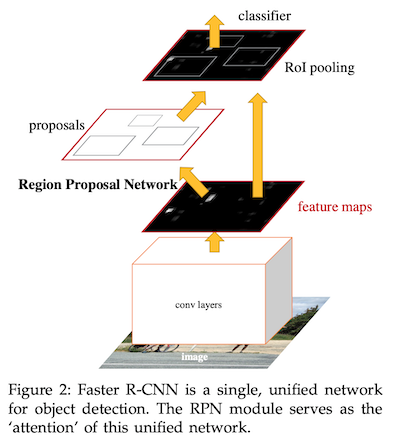

### (3) One-Stageの手法とTwo-Stageの手法はどう違うのか。
-  OverFeat<sup>※</sup>がOne-Stageの手法を提案しており、Faster R-CNNはTwo-Stageの手法を提案している。OverFeatでは、領域ごとの特徴は、スケールピラミッド上の1つのアスペクト比のスライディングウィンドウから取得する。（Figure.1（b）参照）
   これらの特徴は、オブジェクトの場所とカテゴリを同時に決定するために使用される。
   対してRPNでは、特徴は正方形のスライディングウィンドウからのものであり、異なるスケールとアスペクト比のアンカーに関連する提案を予測する。どちらの方法でもスライディングウィンドウを使用するが、領域提案タスクはFaster R-CNNの最初の段階であり、ダウンストリームのFast R-CNNにてカテゴリを決定する。（参照：P１0、左列の1段落目）
   
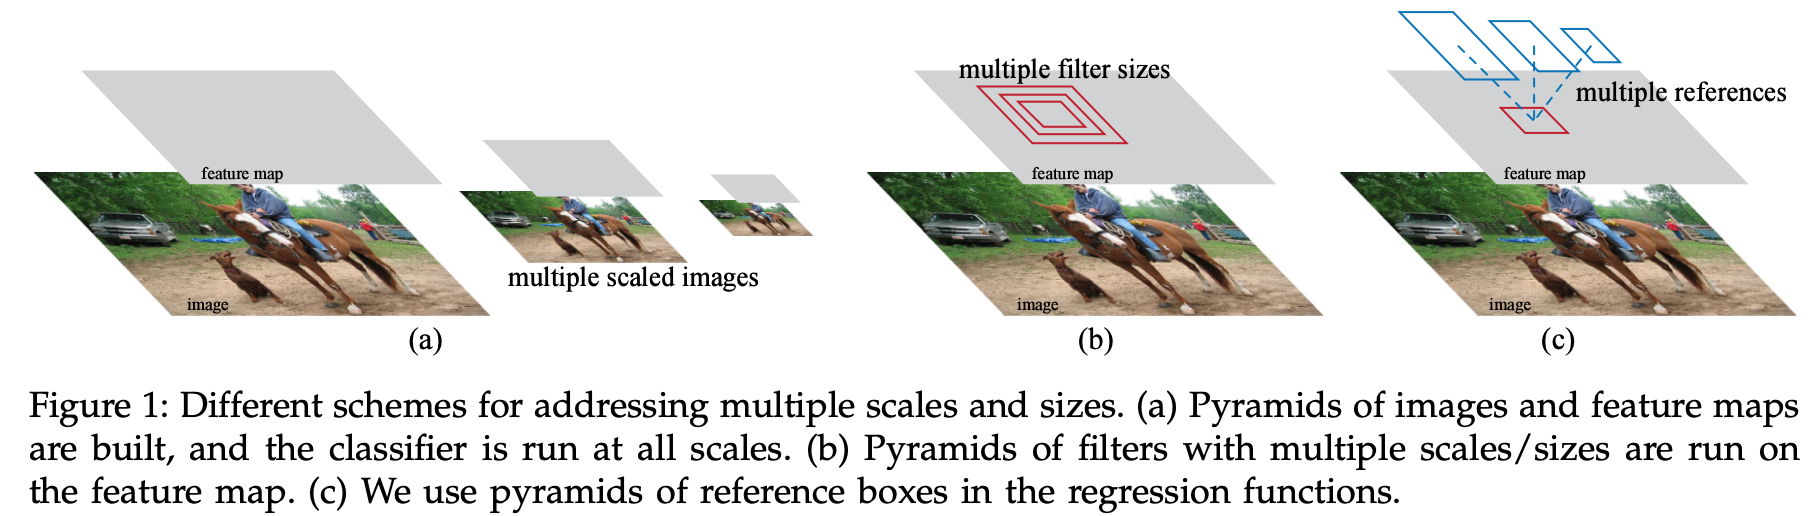   


論文抜粋：<br>
One-Stage Detection vs. Two-Stage Proposal + Detection. The OverFeat paper [9] proposes a detection
method that uses regressors and classifiers on sliding
windows over convolutional feature maps. OverFeat
is a one-stage, class-specific detection pipeline, and ours
is a two-stage cascade consisting of class-agnostic proposals and class-specific detections. In OverFeat, the
region-wise features come from a sliding window of
one aspect ratio over a scale pyramid. These features
are used to simultaneously determine the location and
category of objects. In RPN, the features are from
square (3×3) sliding windows and predict proposals
relative to anchors with different scales and aspect
ratios. Though both methods use sliding windows, the
region proposal task is only the first stage of Faster RCNN—the downstream Fast R-CNN detector attends
to the proposals to refine them. In the second stage of
our cascade, the region-wise features are adaptively
pooled [1], [2] from proposal boxes that more faithfully cover the features of the regions. We believe
these features lead to more accurate detections.


※参照論文：　[9] P. Sermanet, D. Eigen, X. Zhang, M. Mathieu, R. Fergus,　and Y. LeCun, “Overfeat: Integrated recognition, localization　and detection using convolutional networks,” in In

### (4) RPNとは何か。
- Region Proposal Networks(領域提案ネットワーク)の略称。（参照：P１、Abstractの３行目）
- 領域提案ネットワーク（RPN）は、それ自体が「ある画像のどこに物体が写っているか」=「物体が写っている場所と、その矩形の形」を検出するFCNモデルである。任意のサイズの画像をVGG16等のモデルに通して得た特徴マップを入力として受け取り、「物体or背景」の分類問題と「実際の位置（ground truth）とAnchor boxのズレ」の回帰問題を同時に解いていく。（参照：P3、3.1 Region Proposal Networks 全部）

論文抜粋：<br>
3.1 Region Proposal Networks<br>
A Region Proposal Network (RPN) takes an image
(of any size) as input and outputs a set of rectangular
object proposals, each with an objectness score.3 We
model this process with a fully convolutional network
[7], which we describe in this section. Because our ultimate goal is to share computation with a Fast R-CNN
object detection network [2], we assume that both nets
share a common set of convolutional layers. In our experiments, we investigate the Zeiler and Fergus model
[32] (ZF), which has 5 shareable convolutional layers
and the Simonyan and Zisserman model [3] (VGG-16),
which has 13 shareable convolutional layers.
To generate region proposals, we slide a small
network over the convolutional feature map output
by the last shared convolutional layer. This small
network takes as input an n × n spatial window of
the input convolutional feature map. Each sliding
window is mapped to a lower-dimensional feature
(256-d for ZF and 512-d for VGG, with ReLU [33]
following). This feature is fed into two sibling fullyconnected layers—a box-regression layer (reg) and a
box-classification layer (cls). We use n = 3 in this
paper, noting that the effective receptive field on the
input image is large (171 and 228 pixels for ZF and
VGG, respectively). This mini-network is illustrated
at a single position in Figure 3 (left). Note that because the mini-network operates in a sliding-window
fashion, the fully-connected layers are shared across
all spatial locations. This architecture is naturally implemented with an n×n convolutional layer followed
by two sibling 1 × 1 convolutional layers (for reg and
cls, respectively).

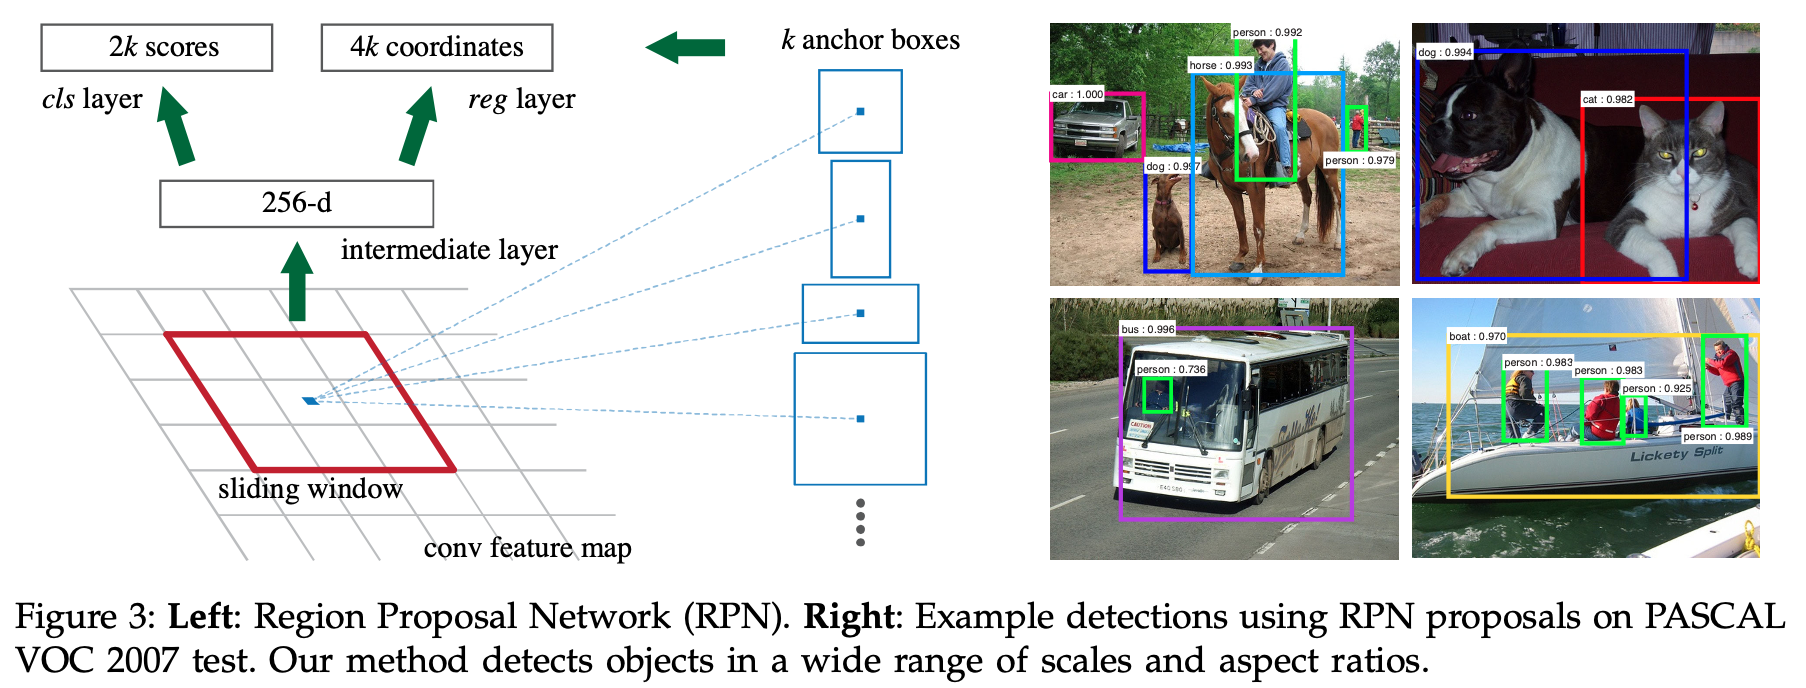

### (5) RoIプーリングとは何か。
- RoI Poolingは分類を行う層（Fast R-Cnn）への入力を、特徴マップのサイズにかかわらず固定長の長さに変換する。物体検出の領域は非常に可変長であり、（同じ画像から検出された椅子とりんごが同じサイズではない　etc.）その得られた領域を次の分類のネットワークで処理するため、固定長に縮小する処理を行う。

※今回の論文にはRoIプーリングについて明確な内容が記載されていなかった為、下記論文を参照<br>
[2] R. Girshick, “Fast R-CNN,” in IEEE International Conference on Computer Vision (ICCV), 2015.<br>
（参照：P2、2.1. The RoI pooling layer 全部）

論文抜粋：<br>
2.1. The RoI pooling layer<br>
The RoI pooling layer uses max pooling to convert the features inside any valid region of interest into a small fea- ture map with a fixed spatial extent of H × W (e.g., 7 × 7), where H and W are layer hyper-parameters that are inde- pendent of any particular RoI. In this paper, an RoI is a rectangular window into a conv feature map. Each RoI is defined by a four-tuple (r, c, h, w) that specifies its top-left corner (r, c) and its height and width (h, w).
RoI max pooling works by dividing the h × w RoI win- dow into an H × W grid of sub-windows of approximate size h/H × w/W and then max-pooling the values in each sub-window into the corresponding output grid cell. Pool- ing is applied independently to each feature map channel, as in standard max pooling. The RoI layer is simply the special-case of the spatial pyramid pooling layer used in SPPnets [11] in which there is only one pyramid level. We use the pooling sub-window calculation given in [11].



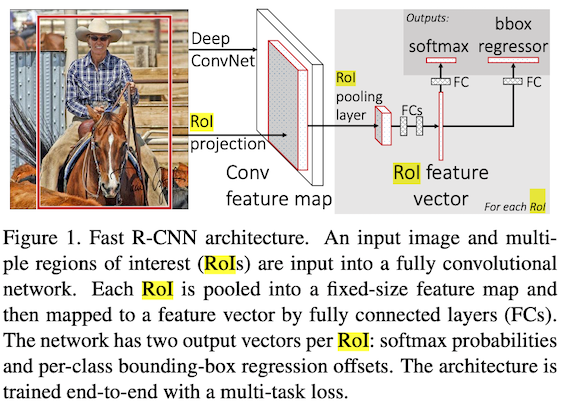

### (6) Anchorのサイズはどうするのが適切か。
-ハイパーパラメータなので、適宜調整すべき。（参照：P6、右列　3.3 Implementation Detailsの2段落目）

論文抜粋：<br>
For anchors, we use 3 scales with box areas of 1282,2562, and 5122 pixels, and 3 aspect ratios of 1:1, 1:2,
and 2:1. These hyper-parameters are not carefully chosen for a particular dataset, and we provide ablation
experiments on their effects in the next section. As discussed, our solution does not need an image pyramid
or filter pyramid to predict regions of multiple scales,
saving considerable running time. Figure 3 (right)
shows the capability of our method for a wide range
of scales and aspect ratios. Table 1 shows the learned
average proposal size for each anchor using the ZF
net. We note that our algorithm allows predictions
that are larger than the underlying receptive field.
Such predictions are not impossible—one may still
roughly infer the extent of an object if only the middle
of the object is visible.

### (7) 何というデータセットを使い、先行研究に比べどういった指標値が得られているか。
- 使用したデータセット：MS COCO
- Fast R-CNN：test-devセットで39.3％mAP@0.5、19.3%mAP@[.5, .95]
- Faster R-CNN：test-devセットで42.1％mAP@0.5、21.5％mAP@[.5, .95]

結果、Fast R-CNNに対し、mAP@0.5の場合は2.8％高く、21.5％mAP@[.5, .95]の場合は2.2％高い。
これは、RPNが優れたパフォーマンスを発揮することを示している。（参照：P11、左列の2、３段落目）
※＠の後ろはIoU
  
論文抜粋：<br>
In Table 11 we first report the results of the Fast
R-CNN system [2] using the implementation in this
paper. Our Fast R-CNN baseline has 39.3% mAP@0.5
on the test-dev set, higher than that reported in [2].
We conjecture that the reason for this gap is mainly
due to the definition of the negative samples and also
the changes of the mini-batch sizes. We also note that
the mAP@[.5, .95] is just comparable.
Next we evaluate our Faster R-CNN system. Using
the COCO training set to train, Faster R-CNN has
42.1% mAP@0.5 and 21.5% mAP@[.5, .95] on the
COCO test-dev set. This is 2.8% higher for mAP@0.5
and 2.2% higher for mAP@[.5, .95] than the Fast RCNN counterpart under the same protocol (Table 11).
This indicates that RPN performs excellent for improving the localization accuracy at higher IoU thresholds. Using the COCO trainval set to train, Faster RCNN has 42.7% mAP@0.5 and 21.9% mAP@[.5, .95] on
the COCO test-dev set. Figure 6 shows some results
on the MS COCO test-dev set.

### (8) （アドバンス課題）Faster R-CNNよりも新しい物体検出の論文では、Faster R-CNNがどう引用されているか。
Mask R-CNNの論文にて、Mask R-CNNのベースモデルとして概要の説明及び検出精度の比較対象として引用されている。
[Mask R-CNN](https://arxiv.org/pdf/1703.06870.pdf)